In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yourcabs/YourCabs_score.csv
/kaggle/input/yourcabs/YourCabs_training.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from geopy import distance

## Importing Data

In [4]:
df = pd.read_csv('/kaggle/input/yourcabs/YourCabs_training.csv')

In [5]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [6]:
df.shape

(43431, 20)

In [7]:
data = df.drop(['Car_Cancellation', 'Cost_of_error'], axis=1)
target = df[['Car_Cancellation']]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

## Checking for Missing Values

In [9]:
data.isnull().mean()

id                     0.000000
user_id                0.000000
vehicle_model_id       0.000000
package_id             0.826161
travel_type_id         0.000000
from_area_id           0.002026
to_area_id             0.210403
from_city_id           0.623656
to_city_id             0.963436
from_date              0.000000
to_date                0.411918
online_booking         0.000000
mobile_site_booking    0.000000
booking_created        0.000000
from_lat               0.002141
from_long              0.002141
to_lat                 0.210403
to_long                0.210403
dtype: float64

## Data Cleaning

In [10]:
data=data.drop(['id','user_id','package_id','to_area_id','from_city_id','to_city_id','to_date'],axis=1)

In [11]:
data.shape

(43431, 11)

In [12]:
data['vehicle_model_id'].value_counts(normalize=True)*100

#so as we can see 12 is covering for 73% of the entire column of vehicle_model_id

12    73.355437
85     5.542124
89     5.505284
65     4.402385
28     3.918860
24     3.439939
87     1.300914
90     0.718381
23     0.683843
86     0.283208
10     0.239460
64     0.195713
54     0.168083
17     0.092100
91     0.057563
30     0.032235
36     0.020723
13     0.016118
72     0.004605
1      0.004605
43     0.004605
14     0.002303
69     0.002303
76     0.002303
75     0.002303
70     0.002303
39     0.002303
Name: vehicle_model_id, dtype: float64

In [13]:
data=data.drop(['vehicle_model_id'],axis=1) #Dropping as single value has more percentage

In [14]:
data.head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,2,83.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750
1,2,1010.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640
2,2,1301.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766
3,2,768.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140
4,2,1365.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720


## Data Transformation

In [15]:
print(data[data['from_lat'] == data['from_lat'].median()]['from_area_id'].max())
print(data['from_lat'].median())
print(data['from_long'].median())

1044.0
12.968887
77.63575


In [16]:
data[data['from_lat'] == data['from_lat'].median()]['from_area_id']

276      1044.0
277      1044.0
1517     1044.0
1668     1044.0
3057     1044.0
3628     1044.0
3826     1044.0
4255     1044.0
4365     1044.0
4619     1044.0
4832     1044.0
4988     1044.0
5179     1044.0
7284     1044.0
7518     1044.0
7694     1044.0
8054     1044.0
8302     1044.0
8401     1044.0
10858    1044.0
11199    1044.0
11202    1044.0
11244    1044.0
14469    1044.0
15858    1044.0
15995    1044.0
16915    1044.0
16916    1044.0
17959    1044.0
18429    1044.0
18658    1044.0
21592    1044.0
22055    1044.0
25121    1044.0
26336    1044.0
29975    1044.0
32812    1044.0
35767    1044.0
36869    1044.0
37378    1044.0
39314    1044.0
40148    1044.0
Name: from_area_id, dtype: float64

In [17]:
data[data['from_lat'] == data['from_lat'].median()].shape

(42, 10)

## Fill missing values

In [18]:
data['from_lat'].fillna(data['from_lat'].median(), inplace=True)
data['from_long'].fillna(data['from_long'].median(), inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43343 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   from_lat             43431 non-null  float64
 7   from_long            43431 non-null  float64
 8   to_lat               34293 non-null  float64
 9   to_long              34293 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.3+ MB


In [20]:
data['from_area_id'].fillna(data[data['from_lat'] == data['from_lat'].median()]['from_area_id'].max(), inplace=True)

In [21]:
data['to_lat'].fillna(df.groupby('from_area_id')['to_lat'].transform('median'), inplace=True)
#Fill null with median for Continuous data and mode for Discrete data
#filling na values of to_lat with median of each group where the group is formed based on from_area_id

In [22]:
data['to_long'] = data['to_long'].fillna(df.groupby('from_area_id')['to_long'].transform('median'))
#filling na values of to_long with median of each group where the group is formed based on from_area_id

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43431 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   from_lat             43431 non-null  float64
 7   from_long            43431 non-null  float64
 8   to_lat               43326 non-null  float64
 9   to_long              43326 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.3+ MB


In [24]:
data[data['to_lat'].isnull()].head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
2158,1,483.0,1/25/2013 6:00,1,0,1/24/2013 15:32,12.953020,77.56333,NaN,NaN
3945,1,1397.0,2/10/2013 16:30,1,0,2/10/2013 13:26,12.968887,77.63575,NaN,NaN
4912,1,1397.0,2/23/2013 6:30,1,0,2/19/2013 21:29,12.968887,77.63575,NaN,NaN
5144,1,1397.0,2/22/2013 13:30,1,0,2/22/2013 10:22,12.968887,77.63575,NaN,NaN
5970,1,1397.0,3/4/2013 7:00,0,0,3/2/2013 17:48,12.968887,77.63575,NaN,NaN


In [25]:
data[data['to_lat'].isnull()]['from_area_id'].value_counts()

1397.0    90
1396.0     3
173.0      2
17.0       2
483.0      1
1215.0     1
1265.0     1
215.0      1
1080.0     1
802.0      1
1164.0     1
178.0      1
Name: from_area_id, dtype: int64

In [26]:
data['to_lat'].fillna(data['to_lat'].median(), inplace=True)
data['to_long'].fillna(data['to_long'].median(), inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43431 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   from_lat             43431 non-null  float64
 7   from_long            43431 non-null  float64
 8   to_lat               43431 non-null  float64
 9   to_long              43431 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.3+ MB


## Encoding

In [28]:
traveltype = pd.get_dummies(data['travel_type_id'],drop_first=True)

In [29]:
data = pd.concat([data,traveltype],axis=1)
data = data.drop(['travel_type_id'],axis=1)

In [30]:
data.rename(columns={2:'traveltype_pointtopoint',3:'traveltype_hourly'},inplace=True)

In [31]:
def cal_distance(from_lat,from_long,to_lat,to_long):
  return distance.distance((from_lat,from_long),(to_lat,to_long)).km

In [32]:
data['distance'] = data.apply(lambda row: cal_distance(row['from_lat'],row['from_long'],row['to_lat'],row['to_long']),axis=1)

In [33]:
data = data.drop(['from_lat','from_long','to_lat','to_long'],axis=1)

## Extracting date and time from timestamp

In [34]:
data['from_date_dt'] = pd.to_datetime(data['from_date']).dt.strftime('%m/%d/%Y')
data['from_time_tm'] = pd.to_datetime(data['from_date']).dt.strftime('%H:%M')
data['booking_created_dt'] = pd.to_datetime(data['booking_created']).dt.strftime('%m/%d/%Y')
data['booking_created_tm'] = pd.to_datetime(data['booking_created']).dt.strftime('%H:%M')

In [35]:
data['from_date_day'] = pd.to_datetime(data['from_date_dt']).dt.day_name()
data['booking_created_day'] = pd.to_datetime(data['booking_created_dt']).dt.day_name()
data['from_date_month'] = pd.to_datetime(data['from_date_dt']).dt.month_name()
data['booking_created_month'] = pd.to_datetime(data['booking_created_dt']).dt.month_name()
data['from_date_week'] = np.where((data['from_date_day']=='Saturday') | (data['from_date_day']=='Sunday'),'Weekend','Weekday')
data['booking_created_week'] = np.where((data['booking_created_day']=='Saturday') | (data['booking_created_day']=='Sunday'),'Weekend','Weekday')

In [36]:
cond = [(pd.to_datetime(data['from_time_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(data['from_time_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(data['from_time_tm']).dt.hour==0)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
data['from_date_session'] = np.select(cond,values)

In [37]:
cond = [(pd.to_datetime(data['booking_created_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(data['booking_created_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(data['booking_created_tm']).dt.hour==0)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
data['booking_created_session'] = np.select(cond,values)

In [38]:
data['time_diff'] = (pd.to_datetime(data['from_date']) - pd.to_datetime(data['booking_created'])).astype('timedelta64[m]')

In [39]:
data[data['time_diff'] < 0].head()

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,traveltype_pointtopoint,traveltype_hourly,distance,from_date_dt,from_time_tm,...,booking_created_tm,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
1763,1298.0,1/20/2013 14:15,0,0,1/20/2013 15:01,0,1,8.482630,01/20/2013,14:15,...,15:01,Sunday,Sunday,January,January,Weekend,Weekend,Afternoon,Afternoon,-46.0
2990,393.0,2/1/2013 9:45,0,0,2/1/2013 13:18,0,1,28.576256,02/01/2013,09:45,...,13:18,Friday,Friday,February,February,Weekday,Weekday,Morning,Afternoon,-213.0
4228,571.0,2/13/2013 18:00,0,0,2/13/2013 18:29,0,1,5.866543,02/13/2013,18:00,...,18:29,Wednesday,Wednesday,February,February,Weekday,Weekday,Evening,Evening,-29.0
5303,1068.0,2/23/2013 18:00,0,0,2/23/2013 18:03,0,1,3.547502,02/23/2013,18:00,...,18:03,Saturday,Saturday,February,February,Weekend,Weekend,Evening,Evening,-3.0
6106,1010.0,3/4/2013 0:30,0,0,3/4/2013 2:00,0,1,10.133543,03/04/2013,00:30,...,02:00,Monday,Monday,March,March,Weekday,Weekday,Night,Late Night,-90.0


In [40]:
data[data['time_diff'] < 0]['time_diff'].count()

42

In [41]:
data = data.drop(['from_date','booking_created'],axis=1)

In [42]:
data = data.drop(['from_date_dt','from_time_tm','booking_created_dt','booking_created_tm'],axis=1)

In [43]:
data_merged = pd.concat([data,target],axis=1,join='inner')
data['from_area_id'] = round(data_merged.groupby('from_area_id')['Car_Cancellation'].sum()/data_merged.groupby('from_area_id')['Car_Cancellation'].count(),2)
data['from_area_id'].replace(np.nan,0,inplace=True)

In [44]:
cond = [(data['from_area_id'].astype('float').between(0,0.33)),
        (data['from_area_id'].astype('float').between(0.34,0.66)),
        (data['from_area_id'].astype('float').between(0.67,1.0))]
values = ['Low Cancellation','Medium Cancellation','High Cancellation']
data['from_area_id'] = np.select(cond,values)

In [45]:
data.head()

,from_area_id,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
0,Low Cancellation,0,0,1,0,3.980687,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,21.0
1,Low Cancellation,0,0,1,0,14.004432,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night,395.0
2,Low Cancellation,0,0,1,0,12.648909,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,22.0
3,Low Cancellation,0,0,1,0,9.534596,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night,66.0
4,Low Cancellation,0,0,1,0,14.655467,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning,67.0


## Data Visualization

In [46]:
data['from_area_id'].value_counts()

Low Cancellation       43415
Medium Cancellation       11
High Cancellation          5
Name: from_area_id, dtype: int64

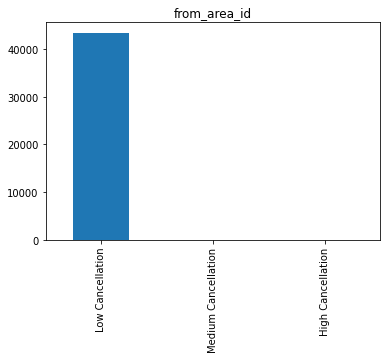

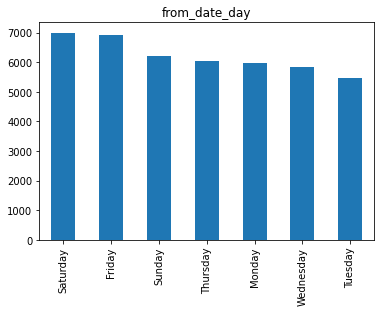

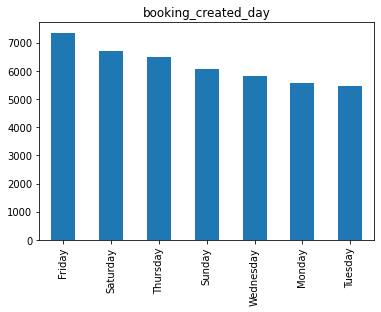

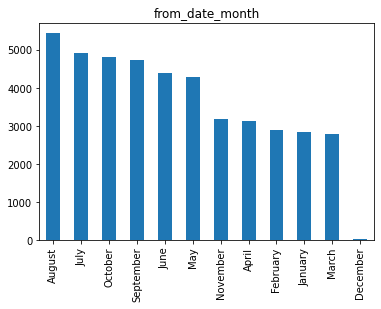

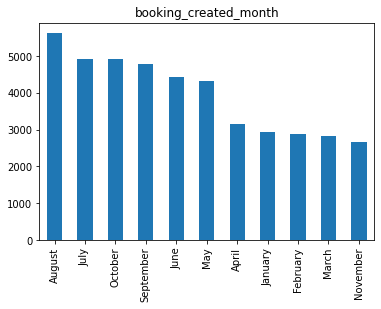

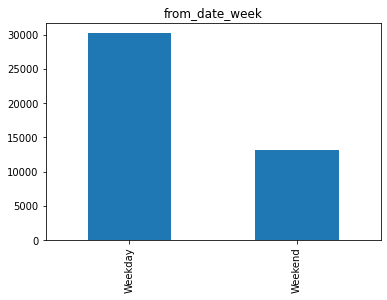

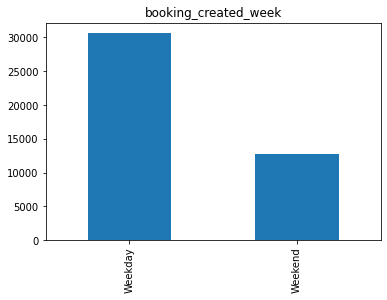

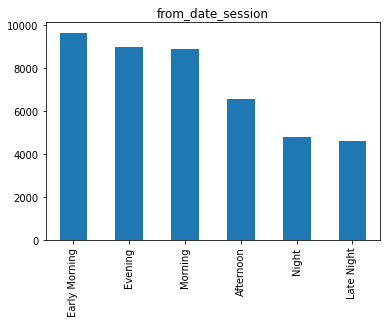

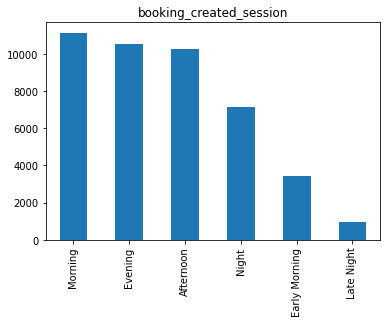

In [47]:
for col in data.columns:
  if data[col].dtype == 'object':
    data[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

## Dividing data into Numerical and Categorical dataframes

In [48]:
num = data.select_dtypes(include='number')
char = data.select_dtypes(include='object')

In [49]:
num.head()

,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,time_diff
0,0,0,1,0,3.980687,21.0
1,0,0,1,0,14.004432,395.0
2,0,0,1,0,12.648909,22.0
3,0,0,1,0,9.534596,66.0
4,0,0,1,0,14.655467,67.0


In [50]:
char.head()

,from_area_id,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session
0,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night
1,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night
2,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night
3,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night
4,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning


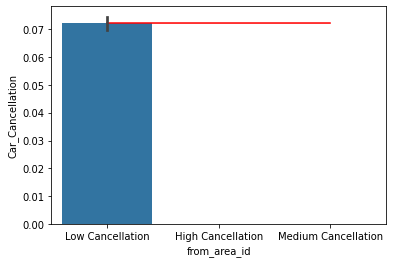

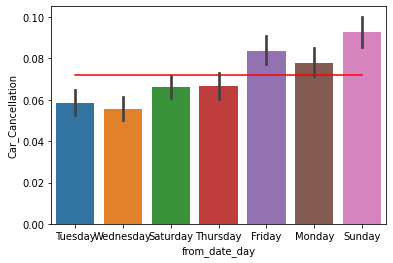

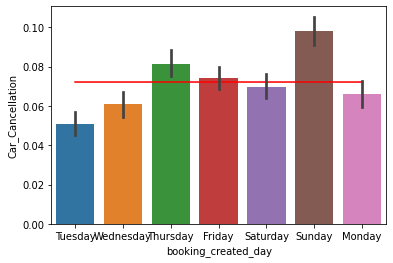

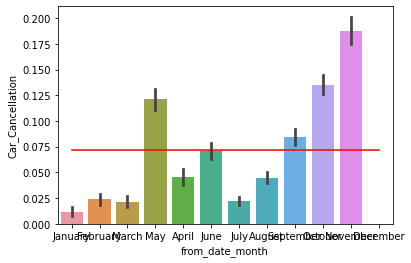

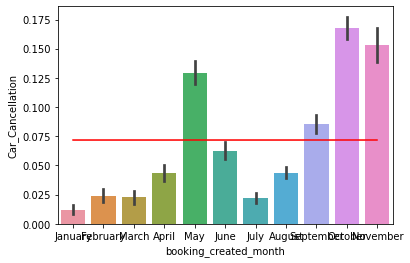

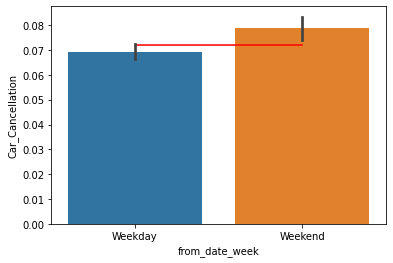

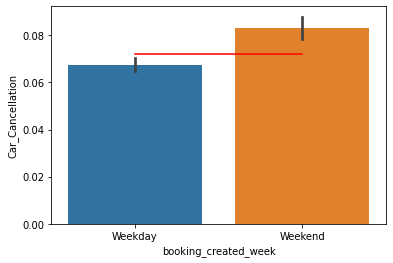

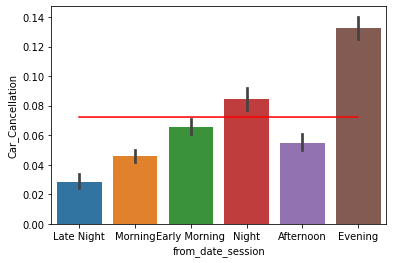

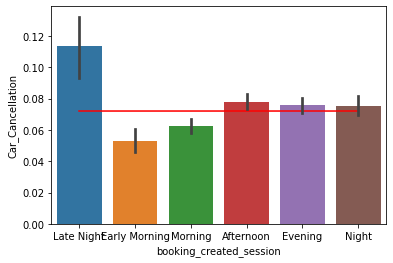

In [51]:
X_char_merged = pd.concat([char,target],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_char_merged['Car_Cancellation'].mean(), data=X_char_merged,estimator=mean, color='red')
    sns.barplot(x=col, y='Car_Cancellation', data=X_char_merged,estimator=mean)
plt.show()

## Encoding Categorical variables

In [52]:
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(43431, 47)

In [53]:
X_char_dum.head()

,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [54]:
data_all = pd.concat([num,X_char_dum],axis=1,join='inner')

In [55]:
data_all.head()

,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,time_diff,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
0,0,0,1,0,3.980687,21.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,1,0,14.004432,395.0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,12.648909,22.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,1,0,9.534596,66.0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,14.655467,67.0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [56]:
data_all.shape

(43431, 53)

## Train Test Split

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_all,target,test_size=0.3,random_state=1)

In [58]:
X_train.head()

,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,time_diff,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
21506,0,0,1,0,9.236426,2832.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12367,0,1,1,0,1.809583,1504.0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
5983,0,0,1,0,13.558000,214.0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
18513,0,0,0,0,18.456702,37.0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
16033,1,0,1,0,13.405912,128.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [59]:
X_test.head()

,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,time_diff,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
26610,0,0,0,1,3.417640,208.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
38515,0,0,0,1,4.104127,69.0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
29806,0,1,0,1,11.849498,457.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
28868,0,0,0,1,8.116004,2371.0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
11163,1,0,1,0,27.427907,444.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [60]:
import warnings
warnings.filterwarnings('ignore')

## Model Building

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=4)
lr.fit(X_train,y_train)

LogisticRegression(random_state=4)

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',random_state=4)

In [63]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
gscv_dtc = GridSearchCV(dtc, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_dtc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=4), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [64]:
gscv_dtc.best_params_

{'max_depth': 7, 'min_samples_split': 50}

In [65]:
dtc=DecisionTreeClassifier(criterion='gini',random_state=4,max_depth=7,min_samples_split=50)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=50, random_state=4)

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini',random_state=4)

In [67]:
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
gscv_rfc = GridSearchCV(rfc, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_rfc.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=4), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [68]:
gscv_rfc.best_params_

{'max_depth': 7, 'min_samples_split': 50}

In [69]:
rfc=RandomForestClassifier(criterion='gini',random_state=4,max_depth=7,min_samples_split=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=50, random_state=4)

## Model Evaluation

In [70]:
y_pred_lr=lr.predict(X_test)
y_pred_dtc=dtc.predict(X_test)
y_pred_rfc=rfc.predict(X_test)

In [71]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [72]:
print('Logistic Regression Metrics')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_lr))
print('Precision:', metrics.precision_score(y_test, y_pred_lr))
print('Recall:', metrics.recall_score(y_test, y_pred_lr))
print('f1_score:', metrics.f1_score(y_test, y_pred_lr))

Logistic Regression Metrics
Accuracy: 0.929623944742901
Precision: 0.5581395348837209
Recall: 0.07725321888412018
f1_score: 0.1357210179076343


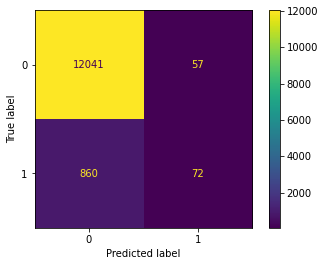

In [73]:
metrics.plot_confusion_matrix(lr,X_test,y_test)

In [74]:
print('Decision Tree Metrics')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_dtc))
print('Precision:', metrics.precision_score(y_test, y_pred_dtc))
print('Recall:', metrics.recall_score(y_test, y_pred_dtc))
print('f1_score:', metrics.f1_score(y_test, y_pred_dtc))

Decision Tree Metrics
Accuracy: 0.9323100537221796
Precision: 0.6865671641791045
Recall: 0.09871244635193133
f1_score: 0.1726078799249531


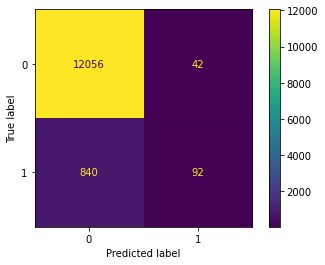

In [75]:
metrics.plot_confusion_matrix(dtc,X_test,y_test)

In [76]:
print('Random Forest Metrics')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rfc))
print('Precision:', metrics.precision_score(y_test, y_pred_rfc))
print('Recall:', metrics.recall_score(y_test, y_pred_rfc))
print('f1_score:', metrics.f1_score(y_test, y_pred_rfc))

Random Forest Metrics
Accuracy: 0.930775134305449
Precision: 1.0
Recall: 0.032188841201716736
f1_score: 0.06237006237006236


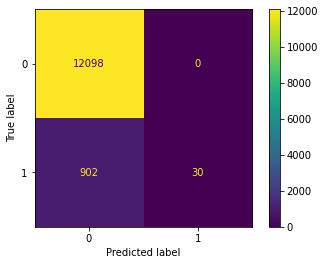

In [77]:
metrics.plot_confusion_matrix(rfc,X_test,y_test)